<a href="https://colab.research.google.com/github/shahpranshu27/HandsOn_ML/blob/main/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure, including the following:

• A DESCR key describing the dataset

• A data key containing an array with one row per instance and one column per
feature

• A target key containing an array with the labels

In [4]:
X, y = mnist["data"], mnist["target"]

Note that the label is string. Most ML algorithms expect numbers, so let's cast y to an integer.

In [11]:
y = y.astype(int)

In [18]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28 x 28 pixels, and each feature simply represents one pixel's intensify, from 0 (white) to 255 (black). Let's take a peek at one digit from the dataset.

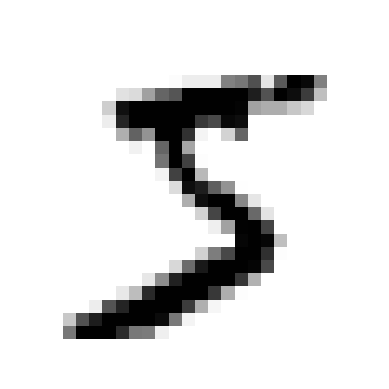

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0]  # Take the first digit
some_digit_image = some_digit.values.reshape(28, 28)  # Reshape to 28x28 array

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [20]:
y[0]

5

In [22]:
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = matplotlib.cm.binary,
             interpolation="nearest")
  plt.axis("off")

In [23]:
import math

def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  n_rows = math.ceil(len(instances)/images_per_row)

  # Append empty images to fill the end of the grid, if needed
  n_empty = n_rows * images_per_row - len(instances)
  padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

  #Reshape the array, so it's organized as a grid containing 28x28 images:
  image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

  # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis)
  # and axes 1 and 3 (horizontal axes). We first need to move the axes that we want to combine
  # next to each other, using transpose(), and only then we can reshape:
  big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

  # Now that we have a big image, we just need to show it:
  plt.imshow(big_image, cmap = matplotlib.cm.binary, **options)
  plt.show()

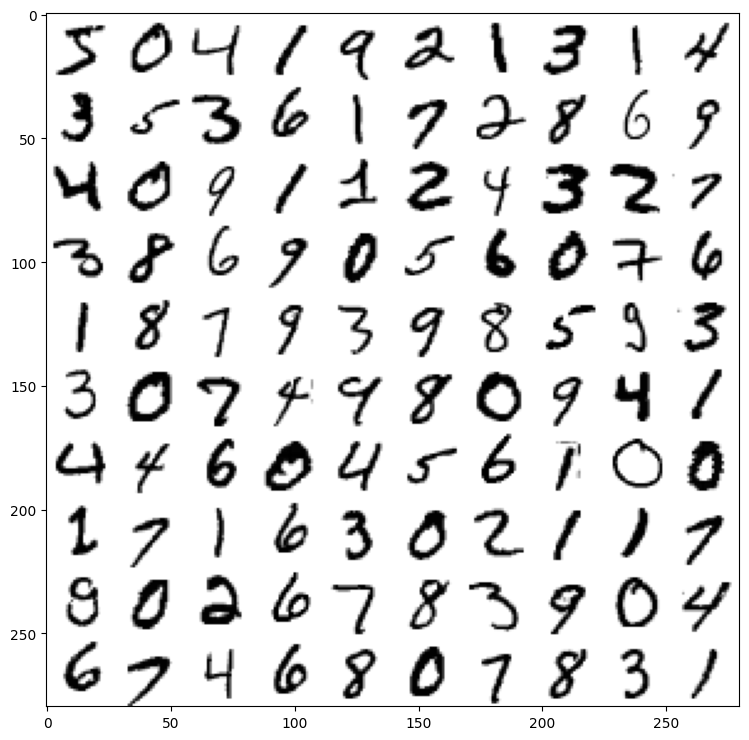

In [24]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let's shuffle the training set, because this guarantees that
all cross-validation folds will be similar (you don’t want one fold to be missing some
digits).

In [25]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5

Let's create the target vectors for this classification task:

In [26]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s `SGDClassifier` class. This classifier
has the advantage of being capable of handling very large datasets efficiently. This is
in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning).

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

The `SGDClassifier` relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the `random_state` parameter.

In [29]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance.

## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part on this topic.

### Measuring Accuracy Using Cross-Validation

#### (Extra) Implementing Cross-Validation

Occasionally you will need more control over the cross-validation process than what
Scikit-Learn provides off the shelf. In these cases, you can implement cross-validation
yourself. The following code does roughly the same thing as Scikit-Learn’s
`cross_val_score()` function, and it prints the same result:


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [34]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.8882
0.8962
0.8546


The `StratifiedKFold` class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.


Let’s use the `cross_val_score()` function to evaluate our SGDClassifier model,
using K-fold cross-validation with three folds. Remember that K-fold cross-validation
means splitting the training set into K folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds:

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96335, 0.96515, 0.9647 ])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class: